In [1]:
import random
import numpy    as np
from matplotlib import pyplot as plt

# Monty-Hall problem

In [2]:
def single_game ():

    # Decide what is behind each door
    car = random.randrange(1,4)
    goats = [1,2,3]
    goats.remove(car)

    # First choice
    # s = switcher, c = conservative, n = newcomer
    s = random.randrange(1,4)
    c = s

    # Open one of the doors with a goat
    x = random.choice(goats)
    if s==car:
        door_open = x
    else:
        goats.remove(s)
        door_open = goats[0]

    # c stays the same, but s changes
    door = [1,2,3]
    door.remove(door_open)
    door.remove(s)
    s = door[0]

    # The newcomer comes in and pick a door
    door = [1,2,3]
    door.remove(door_open)
    n = random.choice(door)
       
    return s,c,n,car

In [3]:
# Play one game
s,c,n,car = single_game()
print(s)
print(c)
print(n)
print(car)

3
1
3
3


In [4]:
# Play multiple games
N = 1000
s,c,n,car =np.array([single_game() for i in range(N)]).T

In [5]:
s_win = np.sum(s == car)
c_win = np.sum(c == car)
n_win = np.sum(n == car)

print('Times that s wins: ', s_win/1000)
print('Times that c wins: ', c_win/1000)
print('Times that n wins: ', n_win/1000)

Times that s wins:  0.686
Times that c wins:  0.314
Times that n wins:  0.494


$\textbf{Now we try the game with 100 doors}$

In [6]:
def single_game_plus (doors):

    # The number of the car
    car = random.randrange(1,doors+1)
    
    goats = np.arange(1,doors+1)
    goats = goats.tolist()
    goats.remove(car)
    goats = np.asarray(goats)

    # First choice
    s = random.randrange(1,doors+1)
    c = s

    # Open the doors with the goats
    x = random.choice(goats)
    
    # c stays the same, but s changes
    if s==car:
        s = x
    else:
        s = car

    # The newcomer comes in and pick a door
    n = random.sample([car,x],1)[0]
    
    return s,c,n,car

In [7]:
# Play multiple games
doors = 100
N = 1000
s,c,n,car = np.array([single_game_plus(doors) for i in range(N)]).T

s_win = np.sum(s == car)
c_win = np.sum(c == car)
n_win = np.sum(n == car)

print('Times that s wins: ', s_win/N)
print('Times that c wins: ', c_win/N)
print('Times that n wins: ', n_win/N)

Times that s wins:  0.991
Times that c wins:  0.009
Times that n wins:  0.488


# PDF of the log

$$
p(x) = \frac{1}{b-a} = \frac{1}{10 - 0.1} = \frac{1}{9.9}
$$
$$
y = log_{10} x \quad\rightarrow\quad x = 10^y \quad\rightarrow\quad \frac{dx}{dy} = 10^y \; ln 10
$$
$$
p(y) = 10^y\;ln 10\;\frac{1}{9.9}
$$

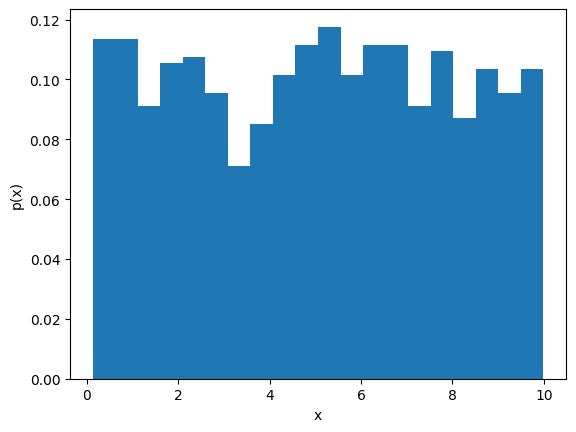

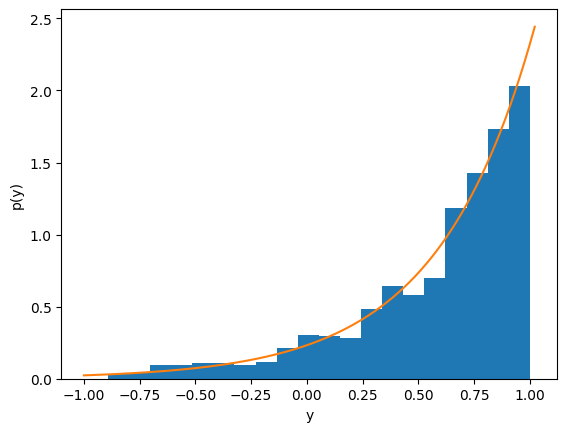

The log of mean of the x is  0.7026406212050669 , the mean of the y is  0.5816957234683661
The log of median of the x is  0.7107757750974981 , the median of the y is  0.710775771023251


In [8]:
# Take an uniform ditribution
N  = 1000
x  = np.random.uniform(0.1,10,N)
x_ = np.linspace(0.1, 10.5, 1000)

# Make the histogram
bins = 20
plt.hist(x, bins=bins, density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

# Take y as the base-10 log of x
y  = np.asarray(np.log10(x))
y_ = np.asarray(np.log10(x_))
# Make the histogram
plt.clf()
plt.hist(y, bins=bins, density=True)
# Overplot the pdf of y
pdf_y = 10**y_*np.log(10)*(1/9.9)
plt.plot(y_,pdf_y)
plt.xlabel('y')
plt.ylabel('p(y)')
plt.show()

#Compute the means and medians
mean_logx = np.log10(np.mean(x))
mean_y = np.mean(y)
median_logx = np.log10(np.median(x))
median_y = np.median(y)
print('The log of mean of the x is ',mean_logx,', the mean of the y is ',mean_y)
print('The log of median of the x is ',median_logx,', the median of the y is ',median_y)

The means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.